In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
WD = "/dss/dssfs02/lwp-dss-0001/pn36po/pn36po-dss-0001/di93vel/atlas_building"
VERSION = 37

In [3]:
color_palette = {
    'FSC': '#8491B4', 
    'ASC': '#E64B35', 
    'PSC': '#4DBBD5',
    'IPS': '#4DBBD5',
    'fetal': '#E68FC6',
    'mature': '#6EA3FA',
    'AT0': '#1F77B4',
    'AT1': '#FF7F0E',
    'AT2': '#279E68',
    'Basal': '#D62728',
    'Bud Tip Progenitor': '#AA40FC',
    'Ciliated': '#8C564B',
    'Club': '#E377C2',
    'Endothelial': '#B5BD61',
    'Goblet': '#17BECF',
    'Ionocyte': '#AEC7E8',
    'Misc': '#0A1172',
    'Neuroendocrine': '#FFBB78',
    'Squamous': '#98DF8A',
    'Stalk': '#FF9896',
    'Tuft': '#C5B0D5',
}

In [4]:
save_dir = os.path.join(WD, 'HEOA', 'notebooks', 'figures')

## Load mapped data

In [5]:
project_dir = os.path.join(WD, 'data')

In [6]:
adata = sc.read_h5ad(os.path.join(project_dir, f"q2r_fetal_adata_latent_v{VERSION}.h5ad"))
adata

/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 312317 × 10
    obs: 'level_1', 'level_2', 'sample_id', 'maturity', 'derive', 'query', 'cell_type_pred', 'cell_type_uncert', 'cell_type', 'cell_type_ref'
    uns: 'cell_type_colors', 'cell_type_pred_colors', 'cell_type_ref_colors', 'derive_colors', 'maturity_colors'
    obsm: 'X_umap'

In [7]:
# cell_type = cell_type_ref + cell_type_pred
adata.obs

,level_1,level_2,sample_id,maturity,derive,query,cell_type_pred,cell_type_uncert,cell_type,cell_type_ref
ACACCCTAGGTAAACT-5891STDY8062349,epithelial,Ciliated,HDBR14808,fetal,NaN,0,NaN,NaN,Ciliated,Ciliated
ACAGCTAAGGGTTTCT-5891STDY8062349,epithelial,Late tip,HDBR14808,fetal,NaN,0,NaN,NaN,Late tip,Late tip
ACCCACTGTATGAAAC-5891STDY8062349,epithelial,Club,HDBR14808,fetal,NaN,0,NaN,NaN,Club,Club
ACGAGGAGTACCGCTG-5891STDY8062349,epithelial,MUC16+ ciliated,HDBR14808,fetal,NaN,0,NaN,NaN,MUC16+ ciliated,MUC16+ ciliated
ACGAGGAGTCCTGCTT-5891STDY8062349,epithelial,Ciliated,HDBR14808,fetal,NaN,0,NaN,NaN,Ciliated,Ciliated
...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGTCTAGCT,epithelial,na,Hein_Dev_2022_Spheroids,NaN,IPS,1,Early airway progenitor,0.150718,Early airway progenitor,NaN
TTTGATCCAACATACC,epithelial,na,Hein_Dev_2022_Spheroids,NaN,IPS,1,Early airway progenitor,0.231783,Early airway progenitor,NaN
TTTGGAGAGGAGAGGC,epithelial,na,Hein_Dev_2022_Spheroids,NaN,IPS,1,Early airway progenitor,0.062955,Early airway progenitor,NaN
TTTGGTTAGTGCAGCA,epithelial,na,Hein_Dev_2022_Spheroids,NaN,IPS,1,Early airway progenitor,0.221862,Early airway progenitor,NaN


## Add simplified cell type annotations

In [8]:
fetal_dict = {
    "Ciliated": "Ciliated",
    "MUC16+ ciliated": "Ciliated",
    "Deuterosomal": "Ciliated",
    "Late airway progenitor": "Club",
    "Mid airway progenitor": "Club",
    "Early tip": "Bud Tip Progenitor",
    "Mid tip": "Bud Tip Progenitor",
    "Late tip": "Bud Tip Progenitor",
    "Pulmonary neuroendocrine": "Neuroendocrine",
    "GHRL+ neuroendocrine": "Neuroendocrine",
    "Pulmonary NE precursor": "Neuroendocrine",
    "GHRL+ NE precursor": "Neuroendocrine",
    "Early airway progenitor": "Club",
    "Early stalk": "Stalk",
    "Mid stalk": "Stalk",
    "Late stalk": "Stalk",
    "AT1": "AT1",
    "AT2": "AT2",
    "Club": "Club",
    "Proximal secretory progenitors": "Club",
    "Proximal secretory 1": "Club",
    "Proximal secretory 2": "Club",
    "Proximal secretory 3": "Club",
    "SMG": "Club",
    "Squamous": "Squamous",
    "Proximal basal": "Basal",
    "Mid basal": "Basal",
    "Late basal": "Basal",
    "SMG basal": "Basal",
    "MUC5AC+ ASCL1+ progenitor": "Misc"
}

mature_dict = {
    "AT0": "AT0",
    "AT1": "AT1",
    "AT2": "AT2",
    "AT2 proliferating": "AT2",
    "Basal resting": "Basal",
    "Club (nasal)": "Club",
    "Club (non-nasal)": "Club",
    "Deuterosomal": "Ciliated",
    "EC aerocyte capillary": "Endothelial",
    "EC arterial": "Endothelial",
    "EC general capillary": "Endothelial",
    "EC venous pulmonary": "Endothelial",
    "EC venous systemic": "Endothelial",
    "Goblet (bronchial)": "Goblet",
    "Goblet (nasal)": "Goblet",
    "Goblet (subsegmental)": "Goblet",
    "Hillock-like": "Basal",
    "Ionocyte": "Ionocyte",
    "Lymphatic EC differentiating": "Endothelial",
    "Lymphatic EC mature": "Endothelial",
    "Lymphatic EC proliferating": "Endothelial",
    "Multiciliated (nasal)": "Ciliated",
    "Multiciliated (non-nasal)": "Ciliated",
    "Neuroendocrine": "Neuroendocrine",
    "SMG duct": "Club",
    "SMG mucous": "Goblet",
    "SMG serous (bronchial)": "Club",
    "SMG serous (nasal)": "Club",
    "Suprabasal": "Basal",
    "Tuft": "Tuft",
    "pre-TB secretory": "Club"
}

combined_dict = fetal_dict.copy()
combined_dict.update(mature_dict)
sorted_combined_dict = dict(sorted(combined_dict.items()))

In [9]:
adata.obs['simple_cell_type'] = adata.obs['cell_type'].map(sorted_combined_dict).copy()
adata.obs.simple_cell_type.value_counts()

Club                  143299
Basal                  60473
Squamous               38965
Neuroendocrine         15889
Ciliated               13215
Goblet                  9881
Stalk                   6846
Bud Tip Progenitor      6354
AT1                     5245
AT2                     4776
Misc                    3271
Endothelial             2831
Tuft                     486
AT0                      404
Ionocyte                 382
Name: simple_cell_type, dtype: int64

## Correct erroneous protocol annotations

In [10]:
# correct an annotation error: Miller cells are derived from FSC cells rather than ASC cells
titles = ['Miller_DevCell_2020_Day_0', 'Miller_DevCell_2020_Day_3', 'Miller_DevCell_2020_Day_21']
adata.obs.loc[adata.obs['sample_id'].isin(titles), 'derive'] = 'FSC'

In [11]:
# function to change 'IPS' to 'PSC'
def change_ips_to_psc(value):
    if value == 'IPS':
        return 'PSC'
    elif isinstance(value, str):
        return value
    else:
        return pd.NA

adata.obs['derive'] = list(map(change_ips_to_psc, adata.obs['derive'].copy()))
adata.obs

,level_1,level_2,sample_id,maturity,derive,query,cell_type_pred,cell_type_uncert,cell_type,cell_type_ref,simple_cell_type
ACACCCTAGGTAAACT-5891STDY8062349,epithelial,Ciliated,HDBR14808,fetal,NaN,0,NaN,NaN,Ciliated,Ciliated,Ciliated
ACAGCTAAGGGTTTCT-5891STDY8062349,epithelial,Late tip,HDBR14808,fetal,NaN,0,NaN,NaN,Late tip,Late tip,Bud Tip Progenitor
ACCCACTGTATGAAAC-5891STDY8062349,epithelial,Club,HDBR14808,fetal,NaN,0,NaN,NaN,Club,Club,Club
ACGAGGAGTACCGCTG-5891STDY8062349,epithelial,MUC16+ ciliated,HDBR14808,fetal,NaN,0,NaN,NaN,MUC16+ ciliated,MUC16+ ciliated,Ciliated
ACGAGGAGTCCTGCTT-5891STDY8062349,epithelial,Ciliated,HDBR14808,fetal,NaN,0,NaN,NaN,Ciliated,Ciliated,Ciliated
...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGTCTAGCT,epithelial,na,Hein_Dev_2022_Spheroids,NaN,PSC,1,Early airway progenitor,0.150718,Early airway progenitor,NaN,Club
TTTGATCCAACATACC,epithelial,na,Hein_Dev_2022_Spheroids,NaN,PSC,1,Early airway progenitor,0.231783,Early airway progenitor,NaN,Club
TTTGGAGAGGAGAGGC,epithelial,na,Hein_Dev_2022_Spheroids,NaN,PSC,1,Early airway progenitor,0.062955,Early airway progenitor,NaN,Club
TTTGGTTAGTGCAGCA,epithelial,na,Hein_Dev_2022_Spheroids,NaN,PSC,1,Early airway progenitor,0.221862,Early airway progenitor,NaN,Club


In [12]:
adata.write(os.path.join(project_dir, f"q2r_adata_latent.h5ad"))

## Compute distances between mapped and reference cells

In [13]:
import pynndescent
import numba

ref = adata[adata.obs['query'] == 0]
query = adata[adata.obs['query'] == 1]

X_train = ref.X
print(X_train.shape)

ref_nn_index = pynndescent.NNDescent(X_train)
ref_nn_index.prepare()

ref_neighbors, ref_distances = ref_nn_index.query(query.X)

(86830, 10)


In [14]:
# PyNNDescent defaults to 10 neighbors
print(ref_neighbors.shape)
print(ref_distances.shape)

(225487, 10)
(225487, 10)


In [15]:
df = pd.DataFrame(ref_distances)
df['sample_id'] = query.obs['sample_id'].values
df['derive'] = query.obs['derive'].values
df

,0,1,2,3,4,5,6,7,8,9,sample_id,derive
0,0.268716,0.317908,0.326454,0.334317,0.395009,0.415521,0.422641,0.442583,0.451941,0.452070,Chan_NatCommun_2022_bronchial_organoids,ASC
1,0.217518,0.251833,0.258507,0.269170,0.274249,0.281504,0.283667,0.286244,0.290112,0.291883,Chan_NatCommun_2022_bronchial_organoids,ASC
2,0.198082,0.203094,0.203697,0.215816,0.225902,0.231042,0.238534,0.244003,0.252533,0.254040,Chan_NatCommun_2022_bronchial_organoids,ASC
3,0.233175,0.255287,0.259560,0.288009,0.291680,0.313660,0.322537,0.327020,0.334098,0.343187,Chan_NatCommun_2022_bronchial_organoids,ASC
4,1.436580,1.508793,1.514158,1.526868,1.535769,1.536328,1.537386,1.543287,1.543818,1.545503,Chan_NatCommun_2022_bronchial_organoids,ASC
...,...,...,...,...,...,...,...,...,...,...,...,...
225482,0.125693,0.203989,0.206346,0.206360,0.207265,0.208560,0.209650,0.210625,0.211039,0.211145,Hein_Dev_2022_Spheroids,PSC
225483,0.242223,0.248032,0.249646,0.256189,0.256682,0.265900,0.267135,0.270052,0.270339,0.270831,Hein_Dev_2022_Spheroids,PSC
225484,0.082230,0.098430,0.102565,0.102854,0.106813,0.108800,0.110067,0.110609,0.111474,0.112926,Hein_Dev_2022_Spheroids,PSC
225485,0.277426,0.282486,0.287343,0.290398,0.290910,0.291004,0.291339,0.291515,0.291816,0.292577,Hein_Dev_2022_Spheroids,PSC


In [16]:
melted_df = pd.melt(df, id_vars=['sample_id', 'derive'], var_name='feature', value_name='distance')
melted_df

,sample_id,derive,feature,distance
0,Chan_NatCommun_2022_bronchial_organoids,ASC,0,0.268716
1,Chan_NatCommun_2022_bronchial_organoids,ASC,0,0.217518
2,Chan_NatCommun_2022_bronchial_organoids,ASC,0,0.198082
3,Chan_NatCommun_2022_bronchial_organoids,ASC,0,0.233175
4,Chan_NatCommun_2022_bronchial_organoids,ASC,0,1.436580
...,...,...,...,...
2254865,Hein_Dev_2022_Spheroids,PSC,9,0.211145
2254866,Hein_Dev_2022_Spheroids,PSC,9,0.270831
2254867,Hein_Dev_2022_Spheroids,PSC,9,0.112926
2254868,Hein_Dev_2022_Spheroids,PSC,9,0.292577


In [17]:
classes = ['ASC', 'FSC', 'PSC']

In [18]:
# count the number of unique sample identifiers per class
r1 = len(pd.unique(query[query.obs.derive == classes[0]].obs.sample_id))
r2 = len(pd.unique(query[query.obs.derive == classes[1]].obs.sample_id))
r3 = len(pd.unique(query[query.obs.derive == classes[2]].obs.sample_id))

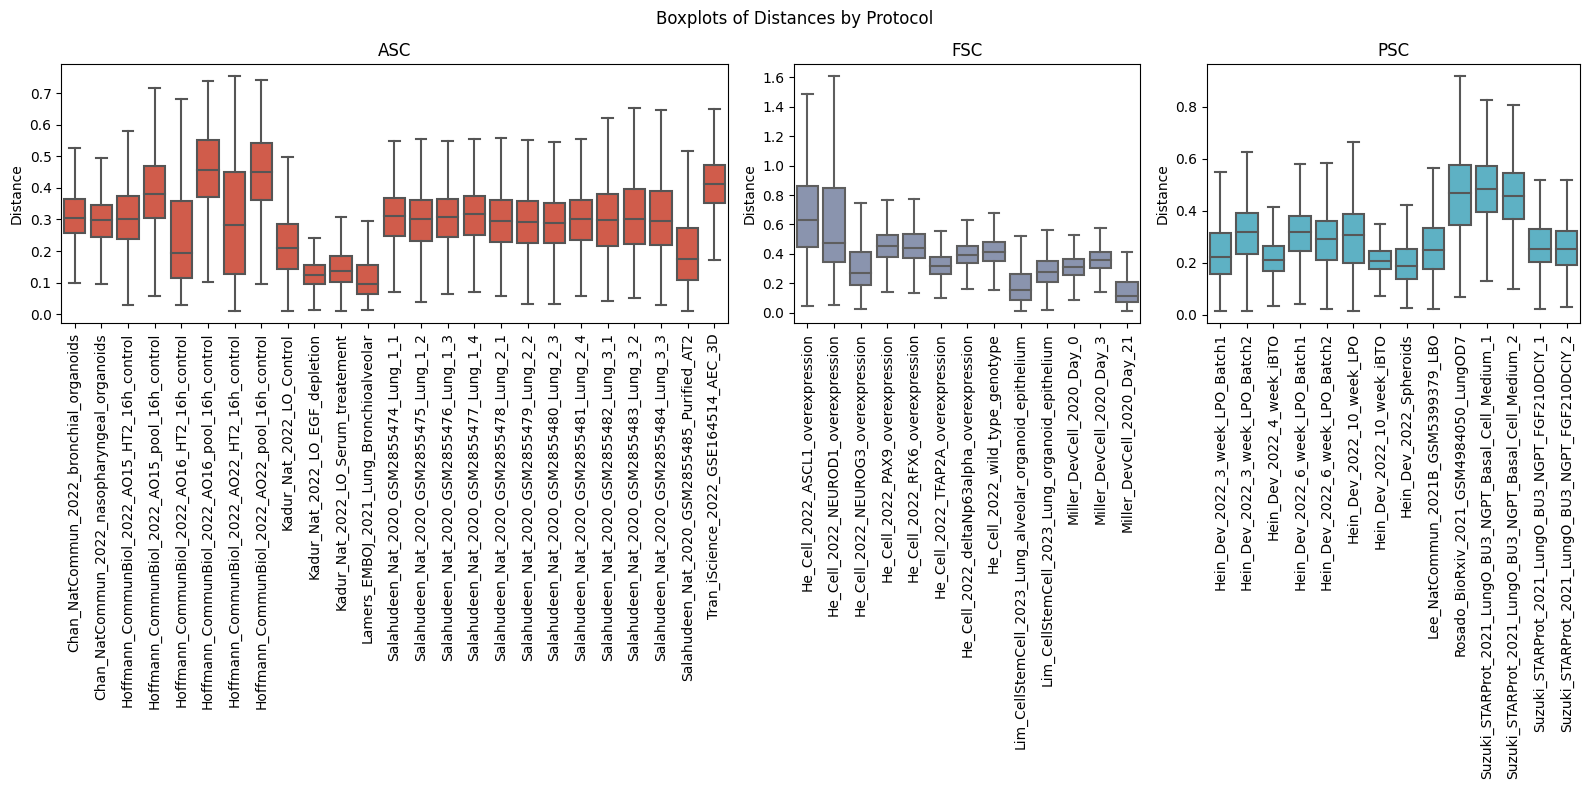

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8), gridspec_kw={'width_ratios': [r1/(r1+r2+r3), r2/(r1+r2+r3), r3/(r1+r2+r3)]})

for i, class_label in enumerate(classes):
    protocol_df = melted_df[melted_df['derive'] == class_label].copy()
    protocol_df.sample_id = protocol_df.sample_id.cat.remove_unused_categories()
    sns.boxplot(x='sample_id', y='distance', data=protocol_df, ax=axes[i], showfliers=False, color=color_palette[class_label])
    axes[i].set_title(class_label)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Distance')
    
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

plt.suptitle('Boxplots of Distances by Protocol')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'distance_plt.pdf'), format='pdf')

## Compute proportions of organoid cells that map onto fetal/mature reference cells

In [20]:
# convert distances to affinities
stds = np.std(ref_distances, axis=1)
stds = (2.0 / stds) ** 2
stds = stds.reshape(-1, 1)
ref_distances_tilda = np.exp(-np.true_divide(ref_distances, stds))
weights = ref_distances_tilda / np.sum(ref_distances_tilda, axis=1, keepdims=True)

In [21]:
@numba.njit
def weighted_prediction(weights, ref_cats):
    N = len(weights)
    predictions = np.zeros((N,), dtype=ref_cats.dtype)
    uncertainty = np.zeros((N,))
    for i in range(N):
        obs_weights = weights[i]
        obs_cats = ref_cats[i]
        highest_prob = 0
        for c in np.unique(obs_cats):
            cand_prob = np.sum(obs_weights[obs_cats == c])
            if cand_prob > highest_prob:
                highest_prob = cand_prob
                predictions[i] = c
                uncertainty[i] = max(1 - highest_prob, 0)

    return predictions, uncertainty


In [22]:
# for each annotation level, get predictions and uncertainty scores
label_keys = ['maturity']

for l in label_keys:
    ref_cats = ref.obs[l].cat.codes.to_numpy()[ref_neighbors]
    p, u = weighted_prediction(weights, ref_cats)
    p = np.asarray(ref.obs[l].cat.categories)[p]
    query.obs[l + "_pred"], query.obs[l + "_uncertainty"] = p, u
    

/tmp/ipykernel_3696074/1672493328.py:8: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  query.obs[l + "_pred"], query.obs[l + "_uncertainty"] = p, u
/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [23]:
query_cp = query.obs.copy()

In [25]:
# transfer organoid cell annotations from the atlas to our query object
atlas = sc.read_h5ad(os.path.join(project_dir, "local.h5ad"))
query_cp['orig_cell_types'] = atlas.obs['level_2'].values
grouped = query_cp[['sample_id', 'orig_cell_types']].groupby('sample_id')

# function to calculate the proportion of 'stem cell' vs. other cell types
def calculate_stem_cell_proportion(group):
    total_cells = len(group)
    stem_cell_count = (group['orig_cell_types'] == 'stem cells').sum()
    return stem_cell_count / total_cells

sample_proportions = grouped.apply(calculate_stem_cell_proportion).reset_index()
sample_proportions.columns = ['sample_id', 'stem_cell_proportion']
sample_proportions_sorted = sample_proportions.sort_values(by='stem_cell_proportion', ascending=False)
sample_proportions_sorted

,sample_id,stem_cell_proportion
28,Lee_NatCommun_2021B_GSM5399379_LBO,1.000000
15,Hein_Dev_2022_10_week_LPO,0.785294
11,Hein_Dev_2022_3_week_LPO_Batch2,0.782454
14,Hein_Dev_2022_6_week_LPO_Batch2,0.709167
17,Hein_Dev_2022_Spheroids,0.616944
5,He_Cell_2022_PAX9_overexpression,0.528380
13,Hein_Dev_2022_6_week_LPO_Batch1,0.516599
12,Hein_Dev_2022_4_week_iBTO,0.467556
10,Hein_Dev_2022_3_week_LPO_Batch1,0.461372
32,Miller_DevCell_2020_Day_3,0.450056


In [26]:
proportions = {}
proportions['ASC'] = sample_proportions_sorted[sample_proportions_sorted['sample_id'].isin(pd.unique(query_cp[query_cp['derive'] == 'ASC']['sample_id']))]
proportions['FSC'] = sample_proportions_sorted[sample_proportions_sorted['sample_id'].isin(pd.unique(query_cp[query_cp['derive'] == 'FSC']['sample_id']))]
proportions['PSC'] = sample_proportions_sorted[sample_proportions_sorted['sample_id'].isin(pd.unique(query_cp[query_cp['derive'] == 'PSC']['sample_id']))]

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8), gridspec_kw={'width_ratios': [r1/(r1+r2+r3), r2/(r1+r2+r3), r3/(r1+r2+r3)]})

for i, class_label in enumerate(classes):
    class_data = query_cp[query_cp['derive'] == class_label]
    grouped = class_data.groupby(['sample_id', 'maturity_pred']).size().unstack(fill_value=0)
    
    filtered_sample_ids = class_data['sample_id'].unique()
    grouped = grouped[grouped.index.isin(filtered_sample_ids)]
    
    grouped['Total'] = grouped.sum(axis=1)
    grouped = grouped.div(grouped['Total'], axis=0)
        
    ax_i = grouped[['fetal', 'mature']].plot(kind='bar', stacked=True, ax=axes[i], color=[color_palette[p] for p in ['fetal', 'mature']])
    x_tick_labels = proportions[class_label].sample_id.values
    axes[i].set_xticklabels(x_tick_labels)
    axes[i].set_title(class_label)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='Prediction', loc='lower right')

plt.suptitle('Proportion of Predictions by Sample ID')
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'proportion_by_protocol_plt.pdf'), format='pdf')

## Plots

### Reference plots

In [91]:
sc.set_figure_params(frameon=False)
sc.set_figure_params(dpi=300)
sc.set_figure_params(figsize=(5, 5))

/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


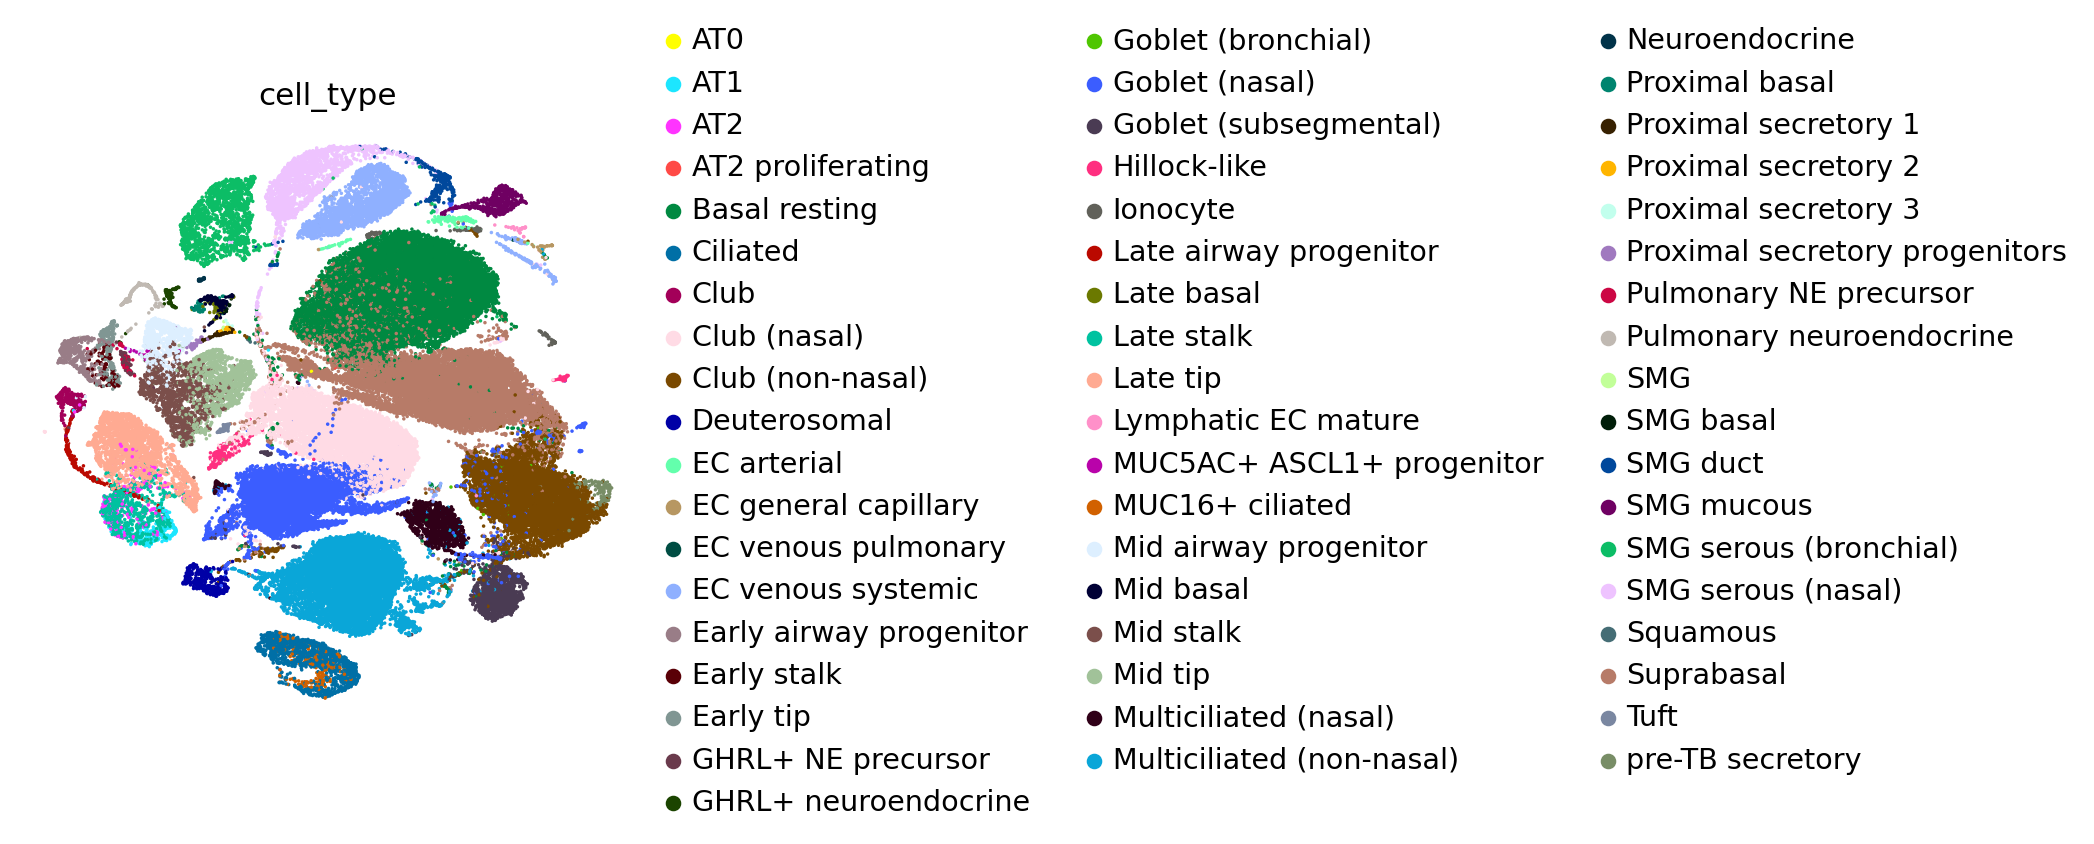

In [95]:
sc.pl.umap(
    adata[adata.obs['query'] == 0],
    color='cell_type',
    size=10,
    show=True,
    frameon=False,
    na_color='lightgray',
    na_in_legend=False,
    save='_cell_type_ref.png'
)

/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


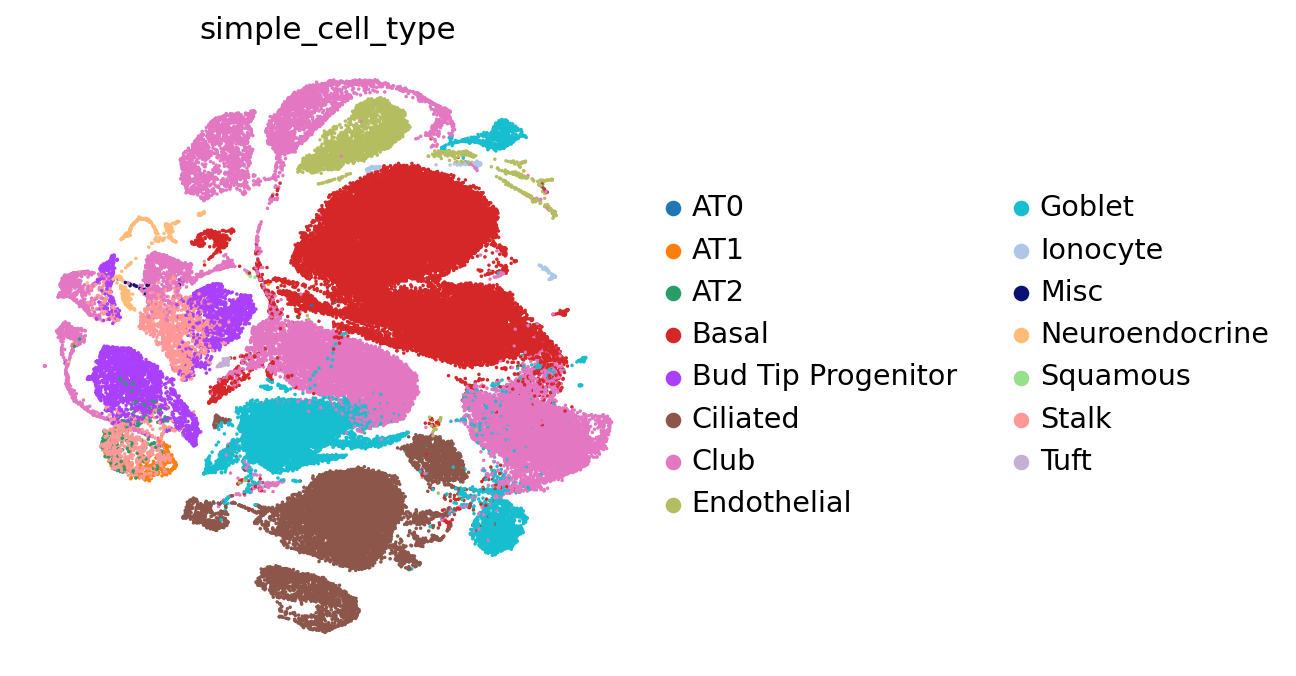

In [96]:
sc.pl.umap(
    adata[adata.obs['query'] == 0],
    color='simple_cell_type',
    palette=color_palette,
    size=10,
    show=True,
    frameon=False,
    na_color='lightgray',
    na_in_legend=False,
    save='_simplified_cell_type_ref.png'
)

/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


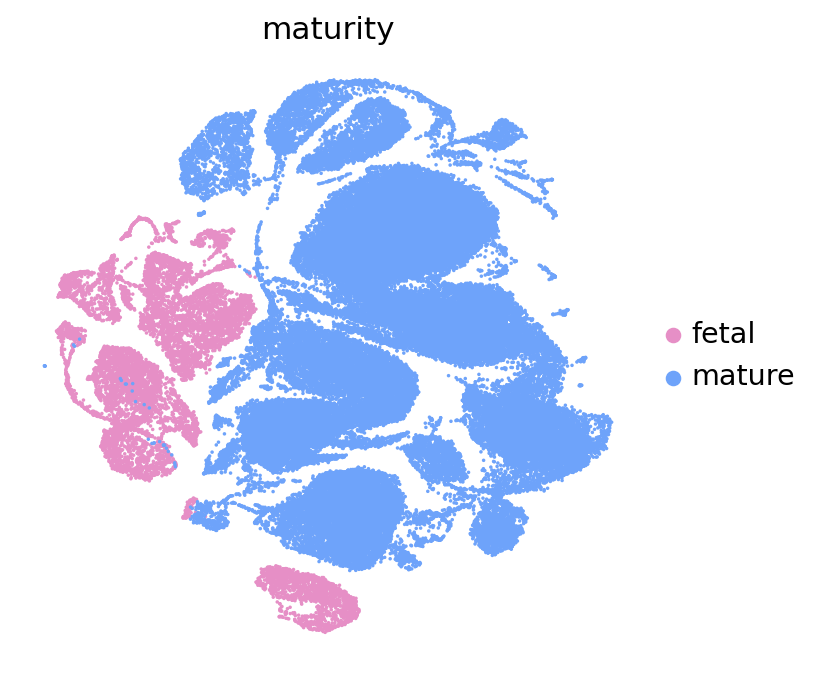

In [97]:
sc.pl.umap(
    adata[adata.obs['maturity'].isin(['fetal','mature'])],
    color='maturity',
    palette=color_palette,
    size=10,
    show=True,
    frameon=False,
    save='_maturity_ref.png'
)

### Plots showing where query cells map

/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


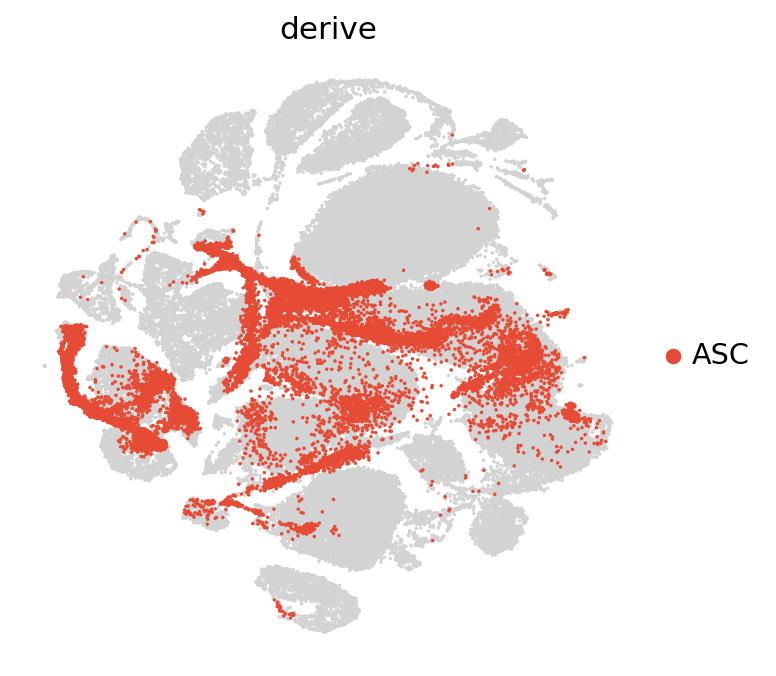

In [98]:
sc.pl.umap(
    adata[adata.obs['derive'].isin(['ASC', pd.NA])],
    color='derive',
    palette=color_palette,
    size=10,
    show=True,
    frameon=False,
    na_color='lightgray',
    na_in_legend=False,
    save='_q2r_asc.png'
)

/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


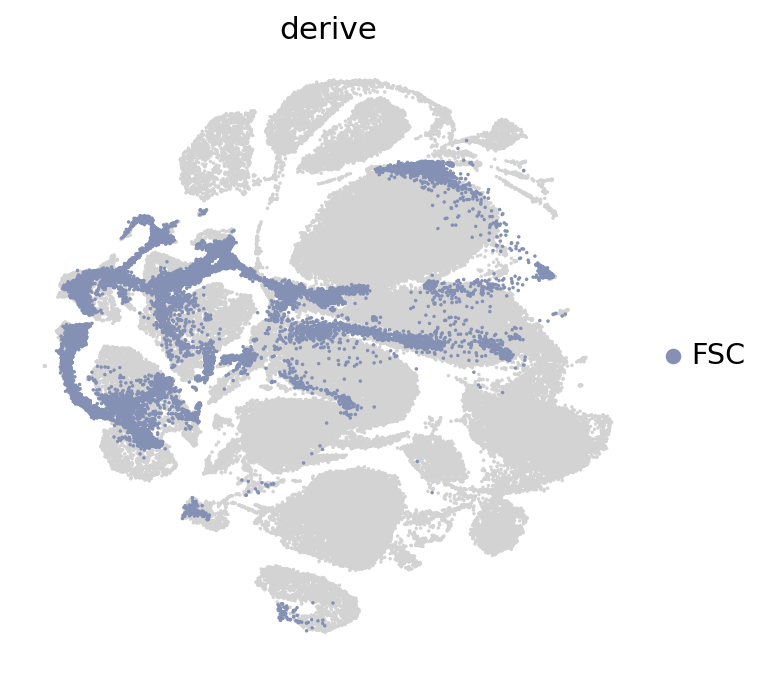

In [99]:
sc.pl.umap(
    adata[adata.obs['derive'].isin(['FSC', pd.NA])],
    color='derive',
    palette=color_palette,
    size=10,
    show=True,
    frameon=False,
    na_color='lightgray',
    na_in_legend=False,
    save='_q2r_fsc.png'
)

/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


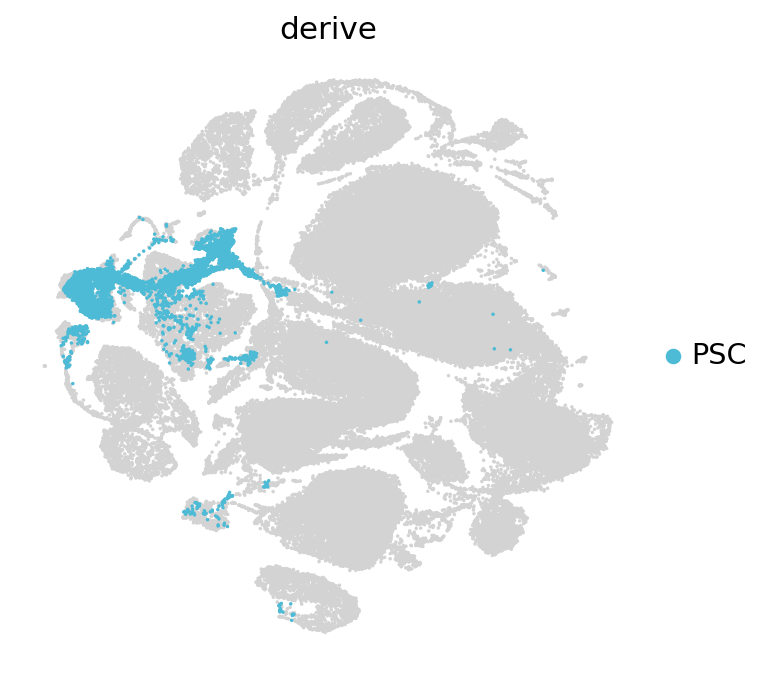

In [100]:
sc.pl.umap(
    adata[adata.obs['derive'].isin(['PSC', pd.NA])],
    color='derive',
    palette=color_palette,
    size=10,
    show=True,
    frameon=False,
    na_color='lightgray',
    na_in_legend=False,
    save='_q2r_psc.png'
)

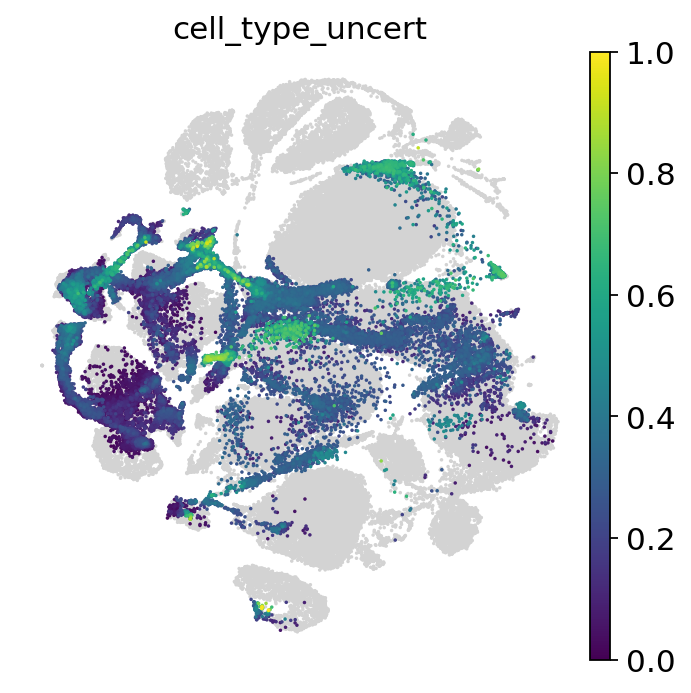

In [101]:
sc.pl.umap(
    adata,
    color='cell_type_uncert',
    size=10,
    show=True,
    frameon=False,
    na_color='lightgray',
    save='_q2r_uncert.png'
)

In [102]:
adata.obs['simple_cell_type_organoid'] = np.where(adata.obs['query'] == 1, adata.obs['simple_cell_type'], pd.NA)
adata.obs['simple_cell_type_organoid'] = adata.obs['simple_cell_type_organoid'].astype('category')
adata.obs['simple_cell_type_organoid'].cat.set_categories(set(list(sorted_combined_dict.values())))

ACACCCTAGGTAAACT-5891STDY8062349     NaN
ACAGCTAAGGGTTTCT-5891STDY8062349     NaN
ACCCACTGTATGAAAC-5891STDY8062349     NaN
ACGAGGAGTACCGCTG-5891STDY8062349     NaN
ACGAGGAGTCCTGCTT-5891STDY8062349     NaN
                                    ... 
TTTGATCAGTCTAGCT                    Club
TTTGATCCAACATACC                    Club
TTTGGAGAGGAGAGGC                    Club
TTTGGTTAGTGCAGCA                    Club
TTTGTTGCACATGAAA                    Club
Name: simple_cell_type_organoid, Length: 312317, dtype: category
Categories (15, object): ['AT2', 'AT0', 'Club', 'Basal', ..., 'AT1', 'Goblet', 'Ciliated', 'Endothelial']

/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


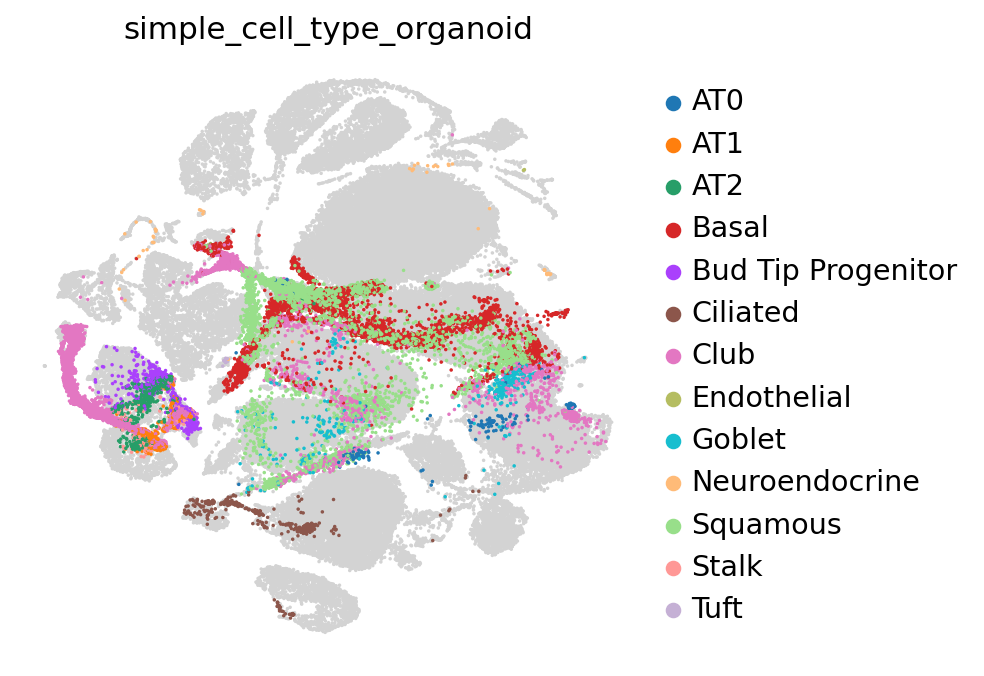

In [103]:
sc.pl.umap(
    adata[adata.obs['derive'].isin(['ASC', pd.NA])],
    color='simple_cell_type_organoid',
    palette=color_palette,
    size=10,
    show=True,
    frameon=False,
    na_color='lightgray',
    na_in_legend=False,
    save='_q2r_predtype_asc.png'
)

/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


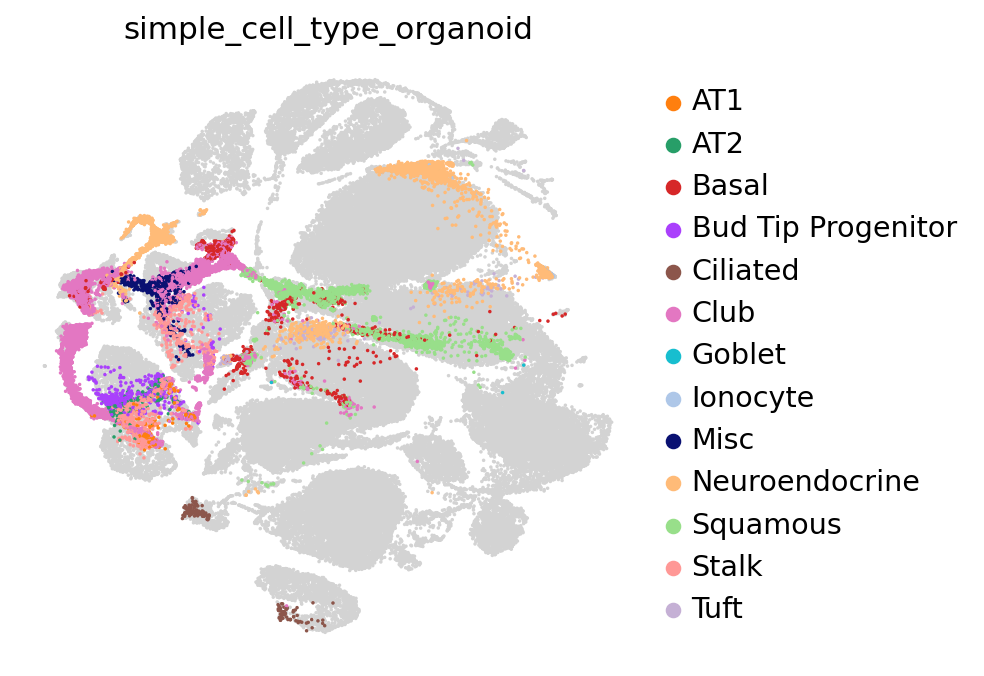

In [104]:
sc.pl.umap(
    adata[adata.obs['derive'].isin(['FSC', pd.NA])],
    color='simple_cell_type_organoid',
    palette=color_palette,
    size=10,
    show=True,
    frameon=False,
    na_color='lightgray',
    na_in_legend=False,
    save='_q2r_predtype_fsc.png'
)

/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/dss/dsshome1/06/di93vel/.conda/envs/heoa_venv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


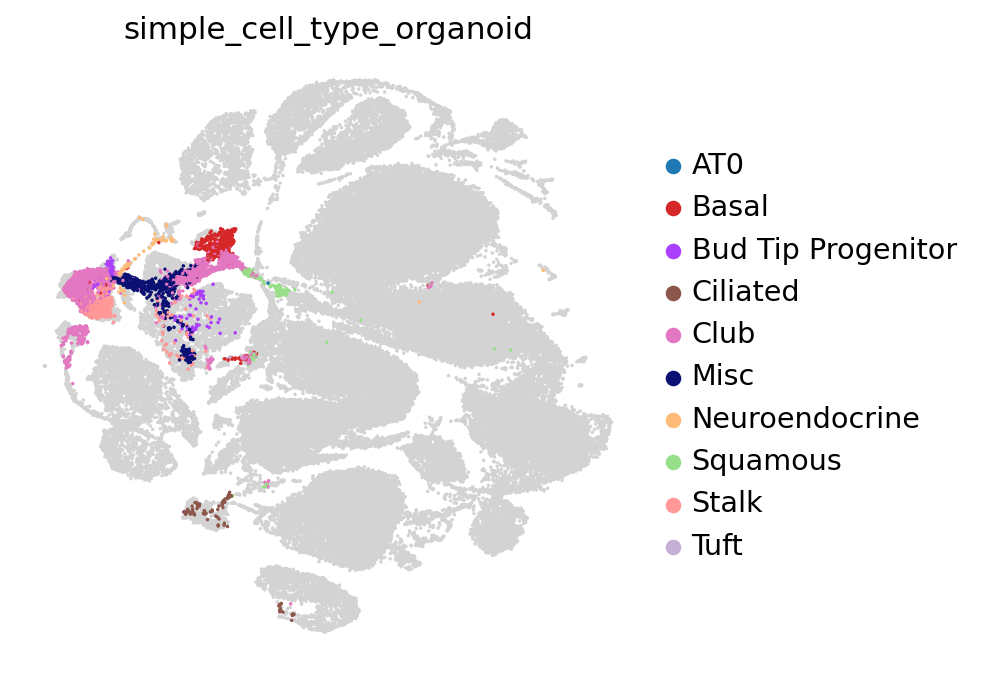

In [105]:
sc.pl.umap(
    adata[adata.obs['derive'].isin(['PSC', pd.NA])],
    color='simple_cell_type_organoid',
    palette=color_palette,
    size=10,
    show=True,
    frameon=False,
    na_color='lightgray',
    na_in_legend=False,
    save='_q2r_predtype_psc.png'
)